Απαλλακτικη Εργασια Σεπτεμβρη
Μαυροπουλος Ανδρεας 217129

In [1]:
# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas
import pandas as pd
# Numpy
import numpy as np

# Sk learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# Tensorflow
import tensorflow as tf

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import math

In [2]:
# Make by default all fig sized 10 ,6
plt.rcParams["figure.figsize"] = (10,6)

Load data into splits

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(f"Training X shape {X_train.shape}")
print(f"Testing X shape {X_test.shape}")
print(f"Training Y shape {y_train.shape}")
print(f"Testing Y shape {y_test.shape}")

170508288/170498071 [==============================] - 11s 0us/step
Training X shape (50000, 32, 32, 3)
Testing X shape (10000, 32, 32, 3)
Training Y shape (50000, 1)
Testing Y shape (10000, 1)


In [4]:
# setup class names
class_names = ['airplane', 'automobile','bird', 'cat','deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

## Plot some examples

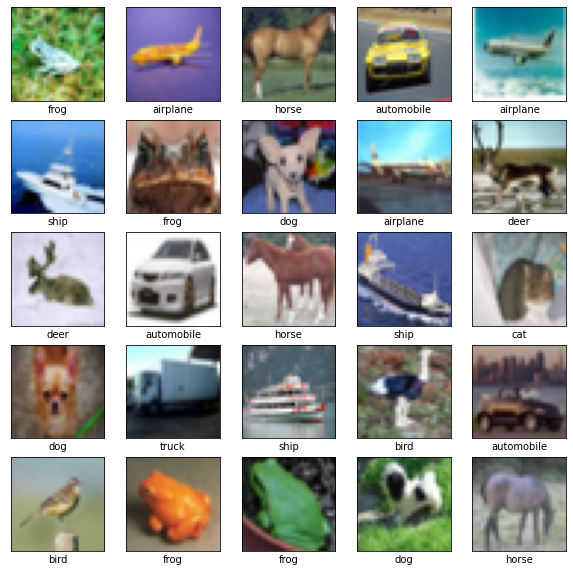

In [5]:
INPUT_SHAPE = (32, 32, 3)

plt.figure(figsize=(10,10))
i = 0
for i, img in enumerate(np.random.randint(0, 4999, 25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[img],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[img].item()])
  i +=1
plt.show()

## Normalize data

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Function to make model

In [7]:
def cifar_model(lr,alpha):
  """
  Build a cifar model using the sequential keras api
  Takes as input the learning rate and the alpha regulizer
  """
  model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation="relu", input_shape = INPUT_SHAPE,
                               kernel_regularizer = tf.keras.regularizers.L2(alpha)),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape = INPUT_SHAPE,
                               kernel_regularizer = tf.keras.regularizers.L2(alpha)),
        tf.keras.layers.MaxPooling2D((2,2)),

       tf.keras.layers.Conv2D(64,(3,3),activation="relu", input_shape = INPUT_SHAPE,
                               kernel_regularizer = tf.keras.regularizers.L2(alpha)),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
  return model

In [8]:
def plot_history(history):
  """
  Gets the model history and plots out the loss over epochs
  """
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

In [9]:
model_1 = cifar_model(lr = 0.001 ,
                      alpha = 0)
model_1

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

## Ερώτημα 3: Πόσες παραμέτρους εκπαίδευσης έχει το μοντέλο σας; Εξηγήστε.


---

Από το summary του μοντέλου βλέπουμε ότι οι παράμετροι εκπαίδευσης που έχει το μοντέλο μας είναι περίπου 26 χιλιάδες. Οι εκπαιδευομενες παράμετροι είναι ο αριθμός των νευρώνων μέσα των οποίων το μοντέλο μας μαθαίνει. Αποτελούνται από τα βάρη και τα biases ενός μοντέλου. Μετριούνται ως εξής: inputs* outputs + biases

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y_labels = label_as_binary.fit_transform(y_train)

test_y_labels = label_as_binary.transform(y_test)

In [12]:

# Set seed
tf.random.set_seed(42)

# Setup training size
training_size = 10000

# Setup callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)

# Fit the model
history_1 = model_1.fit(X_train[:training_size],
                        train_y_labels[:training_size],
                        validation_data = (X_test,test_y_labels),
                        batch_size=256,
                        callbacks = [callback],
                        epochs=100)

Epoch 1/100
40/40 [==============================] - 9s 206ms/step - loss: 2.2128 - accuracy: 0.1694 - val_loss: 2.0174 - val_accuracy: 0.2575
Epoch 2/100
40/40 [==============================] - 8s 200ms/step - loss: 1.8975 - accuracy: 0.3007 - val_loss: 1.8415 - val_accuracy: 0.3237
Epoch 3/100
40/40 [==============================] - 8s 199ms/step - loss: 1.7679 - accuracy: 0.3517 - val_loss: 1.7328 - val_accuracy: 0.3786
Epoch 4/100
40/40 [==============================] - 8s 201ms/step - loss: 1.6774 - accuracy: 0.3866 - val_loss: 1.6703 - val_accuracy: 0.3903
Epoch 5/100
40/40 [==============================] - 8s 199ms/step - loss: 1.6192 - accuracy: 0.4078 - val_loss: 1.6824 - val_accuracy: 0.3992
Epoch 6/100
40/40 [==============================] - 8s 199ms/step - loss: 1.5886 - accuracy: 0.4206 - val_loss: 1.5572 - val_accuracy: 0.4434
Epoch 7/100
40/40 [==============================] - 8s 199ms/step - loss: 1.5253 - accuracy: 0.4531 - val_loss: 1.5248 - val_accuracy: 0.4547

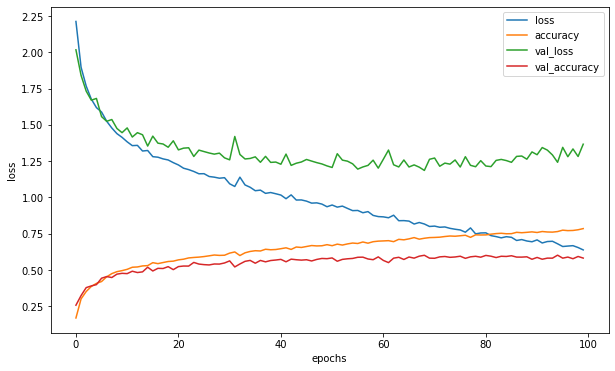

In [13]:
plot_history(history_1)

In [14]:
model_2 = cifar_model(lr = 0.001 ,
                      alpha = 0.01)
model_2

# Setup random seed
tf.random.set_seed(42)

# Setup training size
training_size = 10000

# Setup callbacks
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)

# Fit the model
history_2 = model_2.fit(X_train[:training_size],
                        train_y_labels[:training_size],
                        validation_data = (X_test,test_y_labels),
                        batch_size=256,
                        callbacks = [callback],
                        epochs=100)

Epoch 1/100
40/40 [==============================] - 9s 208ms/step - loss: 2.7052 - accuracy: 0.1618 - val_loss: 2.4509 - val_accuracy: 0.2314
Epoch 2/100
40/40 [==============================] - 8s 201ms/step - loss: 2.2688 - accuracy: 0.2454 - val_loss: 2.1684 - val_accuracy: 0.2671
Epoch 3/100
40/40 [==============================] - 8s 201ms/step - loss: 2.0837 - accuracy: 0.2949 - val_loss: 2.0202 - val_accuracy: 0.3252
Epoch 4/100
40/40 [==============================] - 8s 200ms/step - loss: 1.9840 - accuracy: 0.3291 - val_loss: 1.9634 - val_accuracy: 0.3420
Epoch 5/100
40/40 [==============================] - 8s 200ms/step - loss: 1.9325 - accuracy: 0.3509 - val_loss: 1.9396 - val_accuracy: 0.3617
Epoch 6/100
40/40 [==============================] - 8s 201ms/step - loss: 1.9014 - accuracy: 0.3649 - val_loss: 1.8794 - val_accuracy: 0.3784
Epoch 7/100
40/40 [==============================] - 8s 200ms/step - loss: 1.8677 - accuracy: 0.3761 - val_loss: 1.9147 - val_accuracy: 0.3687

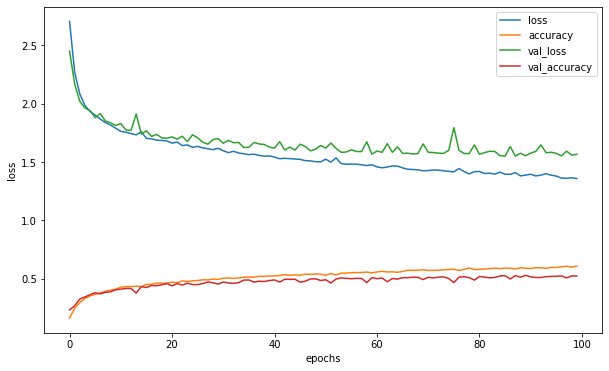

In [15]:
plot_history(history_2)

## Try to find the best learning rate

In [16]:
model_3 = cifar_model(1e-4,0)

# Setup random seed
tf.random.set_seed(42)

# Setup learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))


# Finnaly fit the model
history_3 = model_3.fit(X_train[:training_size],
                        train_y_labels[:training_size],
                        validation_data = (X_test,test_y_labels),
                        batch_size=256,
                        callbacks = [callback,lr_scheduler],
                        epochs=100)

Epoch 1/100
40/40 [==============================] - 9s 203ms/step - loss: 2.2975 - accuracy: 0.1084 - val_loss: 2.2920 - val_accuracy: 0.1310
Epoch 2/100
40/40 [==============================] - 8s 195ms/step - loss: 2.2848 - accuracy: 0.1506 - val_loss: 2.2777 - val_accuracy: 0.1544
Epoch 3/100
40/40 [==============================] - 8s 196ms/step - loss: 2.2609 - accuracy: 0.1938 - val_loss: 2.2447 - val_accuracy: 0.2048
Epoch 4/100
40/40 [==============================] - 8s 197ms/step - loss: 2.2120 - accuracy: 0.2180 - val_loss: 2.1750 - val_accuracy: 0.2356
Epoch 5/100
40/40 [==============================] - 8s 198ms/step - loss: 2.1175 - accuracy: 0.2562 - val_loss: 2.0709 - val_accuracy: 0.2839
Epoch 6/100
40/40 [==============================] - 8s 199ms/step - loss: 2.0084 - accuracy: 0.2919 - val_loss: 1.9629 - val_accuracy: 0.2999
Epoch 7/100
40/40 [==============================] - 8s 199ms/step - loss: 1.9158 - accuracy: 0.3162 - val_loss: 1.8874 - val_accuracy: 0.3265

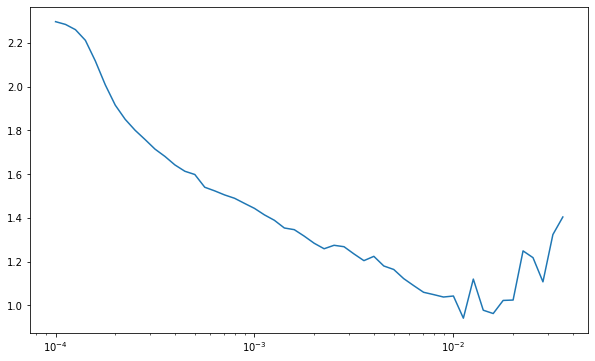

In [17]:
total_epochs = len(history_3.history['loss'])

# Lets plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(total_epochs)/20))
plt.semilogx(lrs,history_3.history["loss"])

### In order to get the best learning rate we must pick a place that the loss still continues to decline while not spiking. From the plot above we can see that the ideal range is between 10**-2 and some steps ahead 

---
So lets try and build a model using this exact learning rate


In [57]:
model_4 = cifar_model(10**-2,0.01)

# Setup random seed
tf.random.set_seed(42)

# Fit the model
history_4 = model_4.fit(X_train[:training_size],
                        train_y_labels[:training_size],
                        validation_data = (X_test,test_y_labels),
                        batch_size=256,
                        callbacks = [callback],
                        epochs=100)

Epoch 1/100
40/40 [==============================] - 9s 202ms/step - loss: 2.3123 - accuracy: 0.1681 - val_loss: 2.0980 - val_accuracy: 0.2314
Epoch 2/100
40/40 [==============================] - 8s 197ms/step - loss: 2.0700 - accuracy: 0.2482 - val_loss: 2.0534 - val_accuracy: 0.2706
Epoch 3/100
40/40 [==============================] - 8s 196ms/step - loss: 2.0292 - accuracy: 0.2710 - val_loss: 2.0038 - val_accuracy: 0.2897
Epoch 4/100
40/40 [==============================] - 8s 195ms/step - loss: 1.9874 - accuracy: 0.2923 - val_loss: 1.9412 - val_accuracy: 0.3293
Epoch 5/100
40/40 [==============================] - 8s 194ms/step - loss: 1.9143 - accuracy: 0.3278 - val_loss: 1.8553 - val_accuracy: 0.3526
Epoch 6/100
40/40 [==============================] - 8s 194ms/step - loss: 1.8535 - accuracy: 0.3554 - val_loss: 1.8340 - val_accuracy: 0.3743
Epoch 7/100
40/40 [==============================] - 8s 194ms/step - loss: 1.8192 - accuracy: 0.3734 - val_loss: 1.9262 - val_accuracy: 0.3439

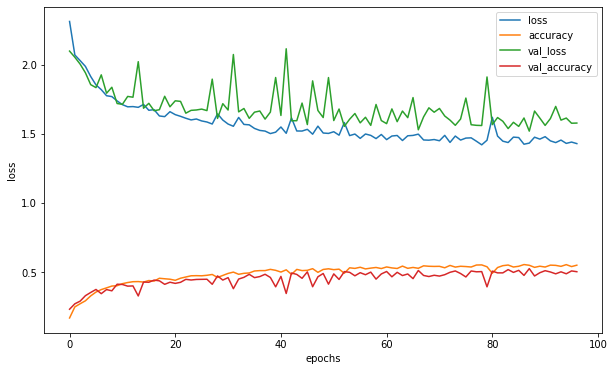

In [64]:
plot_history(history_4)

# Now lets look at some of the model results and plot the loss and accuracy of each one

In [65]:
loss_1 , accuracy_1 = model_1.evaluate(X_test,test_y_labels)
loss_2 , accuracy_2 = model_2.evaluate(X_test,test_y_labels)
loss_3 , accuracy_3 = model_3.evaluate(X_test,test_y_labels)
loss_4 , accuracy_4 = model_4.evaluate(X_test,test_y_labels)


# Put the results into a list
model_results = [["model 1",loss_1,accuracy_1],
                 ["model 2",loss_2,accuracy_2],
                 ["model 3",loss_3,accuracy_3],
                 ["model 4",loss_4,accuracy_4]]
model_results

313/313 [==============================] - 3s 10ms/step - loss: 1.5776 - accuracy: 0.5026


[['model 1', 1.3670378923416138, 0.582099974155426],
 ['model 2', 1.5657446384429932, 0.5223000049591064],
 ['model 3', 2.24810791015625, 0.34769999980926514],
 ['model 4', 1.5776376724243164, 0.5026000142097473]]

In [66]:
# Turn the model results into a dataframe
model_results_df = pd.DataFrame(model_results,columns=["model","loss",'accuracy'])

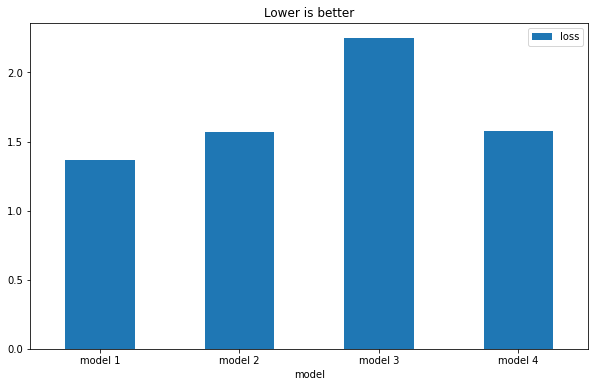

In [67]:
# And finnaly plot the results using a bar plot
# First plot out the loss of our models
model_results_df.plot(x="model",y="loss",kind="bar")
plt.xticks(rotation= "horizontal")
plt.title("Lower is better");

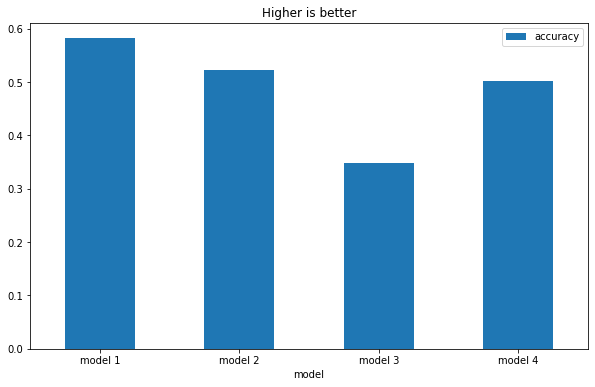

In [68]:
# Secondly plot out the accuracy of our models
model_results_df.plot(x="model",y="accuracy",kind="bar")
plt.xticks(rotation="horizontal")
plt.title("Higher is better");

#Ερώτημα 4: Αξιολογήστε το μοντέλο σας για διαφορετικούς συνδυασμούς των παραμέτρων lr και alpha . Προτείνετε κάποιον συνδυασμό υπερπαραμέτρων. Τι επίδοση έχει το μοντέλο για lr = 0.001 , alpha = 0 και πως συγκρίνεται με την επίδοση για lr = 0.001 , alpha = 0.01 ; Πως εξηγείτε τη διαφορά στην επίδοση των δύο μοντέλων;

---

Για αρχή βλέπουμε ότι την καλύτερη επίδοση την έχει το μοντέλο 1. Αυτό οφείλετε κυρίως στο learning rate καθώς αυτό είναι ένα από τα μεγαλύτερα σε σημαντικότητα hyperparametes. Βλέπουμε ότι έχει μια σχετική μικρή διάφορα με το μοντέλο 2 που η μονή τους διάφορα είναι το alpha tuning. Αυτό μας δείχνει το πόσο μεγάλη σημασία έχει το learning rate στα μοντέλα μας. Το πολύ μικρό η το πολύ μεγάλο learning rate μπορεί να οδηγήσει το μοντέλο σε πολύ ασταθή αποτελέσματα έτσι ώστε να μην μπορεί πια να βελτιωθεί και να δημιουργηθεί ένα μεγάλο bias. Επομένως κάλο είναι να δημιουρουμε ένα μοντέλο όπως στο παράδειγμα μου το μοντέλο 3 που χρησημοποιηθηκε για να βρεθεί ένα κατάλληλο learning rate. Παρατηρούμε άμεσα από τα τευλεταια plots το τι αλλαγή μπορεί να φέρει το learning rate στο accuracy ενός μοντέλου. Τα τελευταία plots μετρήθηκαν με δεδομένα που τα μοντέλα μας δεν είδαν κατά την διάρκεια του training, εχωντας έτσι ένα καλύτερο preview για το πως τα μοντέλα θα μπορούσαν να αποδώσουν σε real world σενάρια.


Ολοκληρωμενο το προτζεκτ: https://colab.research.google.com/drive/1mWFTAA7QCPnazXc2SVnWFyUUahrGsqpm?usp=sharing